<a href="https://colab.research.google.com/github/apps1990/Apps/blob/master/SampleSize_estimation_with_no_info.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Q: Is the average rating of our new drink better or worse than the average rating of our old drink?

# What sample size is needed to "precisely" answer this question?

# The average rating of our old drink is 2 stars (on a 1-3 scale)

***

# Without any additional info, let's just pick some reasonable "true" distribution for ratings on our new drink:

## 1 Star - 15%
## 2 Star - 65%
## 3 Star - 20%

# So that the average rating is 1 $\times$ 0.15 + 2 $\times$ 0.65 + 3 $\times$ 0.2 = 2.05

# Now ... how many samples from this distribution would it take to "precisely" say that the new drink is better?

***

In [2]:
RATING_DISTR = np.array([0.15, 0.65, 0.2])

In [13]:
# n=5
# rating_distr = RATING_DISTR
# randvals = np.random.random(n).reshape(-1,1)
# randvals
# # ratings = np.argmax(randvals < rating_distr.cumsum(), axis=1)
# ratings = np.argmax(randvals < rating_distr.cumsum(), axis=1) + 1
# ratings

In [12]:
def generate_ratings(rating_distr, n):
    #generates n ratings from the given ratings distribution
    randvals = np.random.random(n).reshape(-1,1)
    ratings = np.argmax(randvals < rating_distr.cumsum(), axis=1) + 1
    return ratings

In [14]:
ratings = generate_ratings(RATING_DISTR, 100000)
for i in [1,2,3]:
    print('%s Star: %s'%(i, np.mean(ratings==i)))
print('Average Rating: %s'%ratings.mean())

1 Star: 0.1504
2 Star: 0.64955
3 Star: 0.20005
Average Rating: 2.04965


## Suppose our sample size is just 10

In [15]:
def simulate_runs(rating_distr, n):
    #simulate many runs with that sample size
    avg_ratings = []

    for _ in range(10000):
        curr_ratings = generate_ratings(rating_distr, n)
        avg_ratings.append(curr_ratings.mean())

    return np.array(avg_ratings)

In [16]:
def plot_distribution(n, avg_ratings, plot=True):
    avg, sd = round(avg_ratings.mean(),3), round(avg_ratings.std(),3)
    if avg > 2:
        pct = np.mean(avg_ratings > 2)
    else:
        pct = np.mean(avg_ratings < 2)
    if plot:
        plt.figure(figsize=(10,4))
        sns.distplot(avg_ratings)
        plt.title('n=%s\nAvg: %s | SD: %s\nPct Distr: %s'%(n, avg, sd, pct), fontsize=20)
        plt.axvline(2, color='r')
        plt.xlabel('Avg Rating', fontsize=16)
        plt.ylabel('Density', fontsize=16)

    return pct

<ipython-input-16-ee3c45c5a9c1>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(avg_ratings)


0.4974

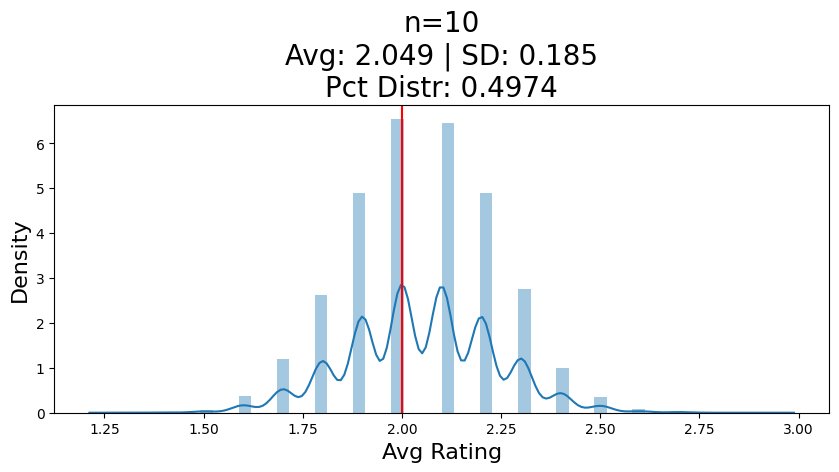

In [17]:
n = 10
avg_ratings = simulate_runs(RATING_DISTR, n)
plot_distribution(n, avg_ratings)

## What if our sample size is 100?

<ipython-input-16-ee3c45c5a9c1>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(avg_ratings)


0.779

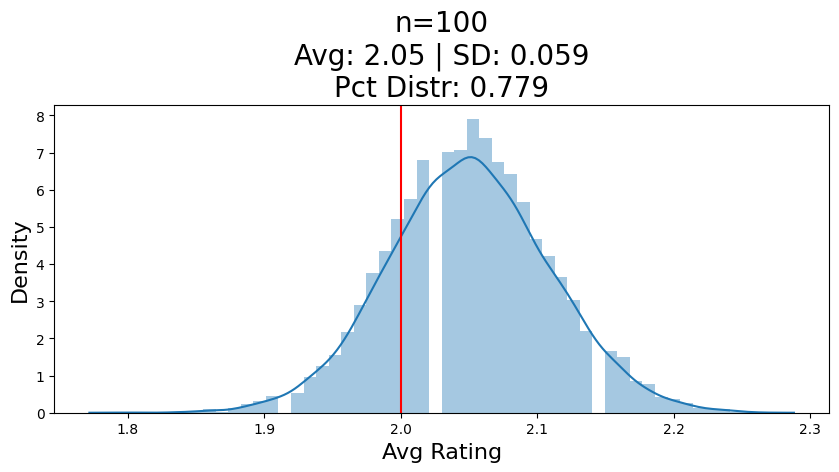

In [18]:
n = 100
avg_ratings = simulate_runs(RATING_DISTR, n)
plot_distribution(n, avg_ratings)

## What if its 1000?

<ipython-input-16-ee3c45c5a9c1>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(avg_ratings)


0.9955

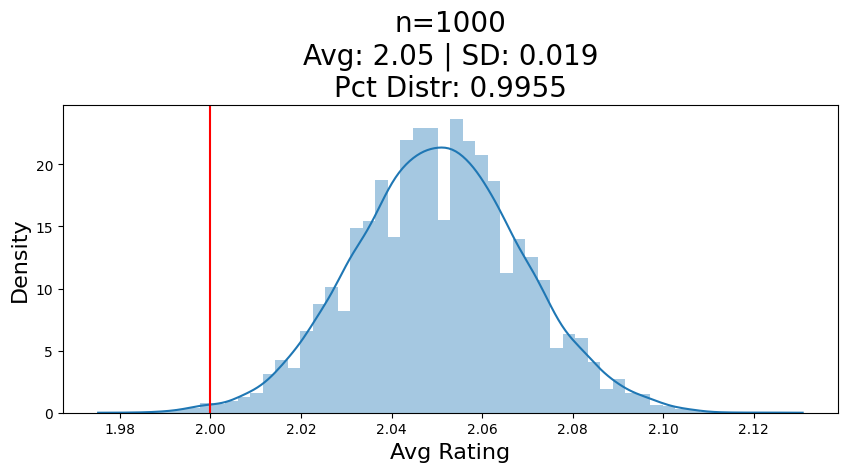

In [19]:
n = 1000
avg_ratings = simulate_runs(RATING_DISTR, n)
plot_distribution(n, avg_ratings)

# But ... all this analysis is dependent on the "true" ratings distribubion above. What if instead it was:

## 1 Star - 5%
## 2 Star - 50%
## 3 Star - 45%

# So that the average rating is 1 $\times$ 0.05 + 2 $\times$ 0.5 + 3 $\times$ 0.45 = 2.4

# Now ... how many samples from this distribution would it take to "precisely" say that the new drink is better?

***

In [20]:
RATING_DISTR = np.array([0.05, 0.5, 0.45])

<ipython-input-16-ee3c45c5a9c1>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(avg_ratings)


0.9686

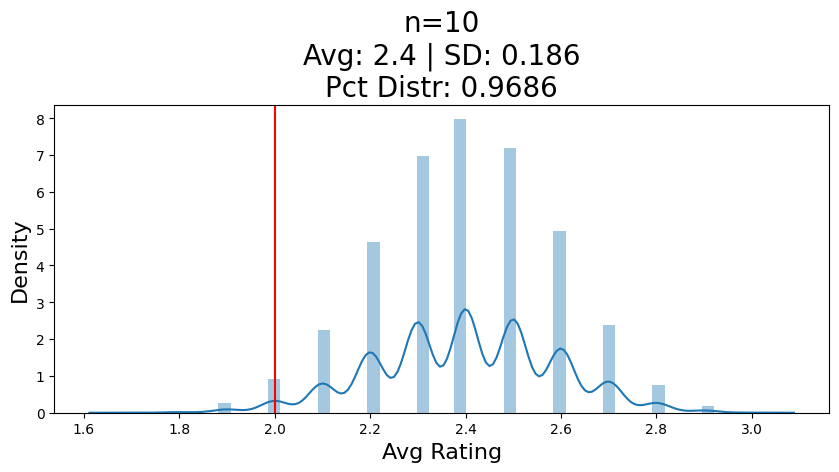

In [21]:
n = 10
avg_ratings = simulate_runs(RATING_DISTR, n)
plot_distribution(n, avg_ratings)

# Now, we can try out a bunch of different "true" distributions and see how the required sample size changes with each one!

In [22]:
#get many possible rating distributions
rating_distributions = []
p1_vals = np.arange(0,1.1,.1)
for p1 in p1_vals:
    for p2 in np.arange(0, 1-p1, 0.1):
        rating_distributions.append(np.array([p1,p2,1-p1-p2]))

In [23]:
#this list will store the required sample size for each rating distribution
required_sample_sizes = []
for rating_distribution in rating_distributions:
    req_samp_size = -1
    for n in [5, 10, 25, 50, 100, 250, 500, 1000]:
        avg_ratings = simulate_runs(rating_distribution, n)
        pct = plot_distribution(n, avg_ratings, plot=False)
        if pct > 0.95:
            req_samp_size = n
            break
    required_sample_sizes.append(req_samp_size)

In [24]:
p1_vals = np.array([item[0] for item in rating_distributions])
p2_vals = np.array([item[1] for item in rating_distributions])

/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


(-0.05, 1.0)

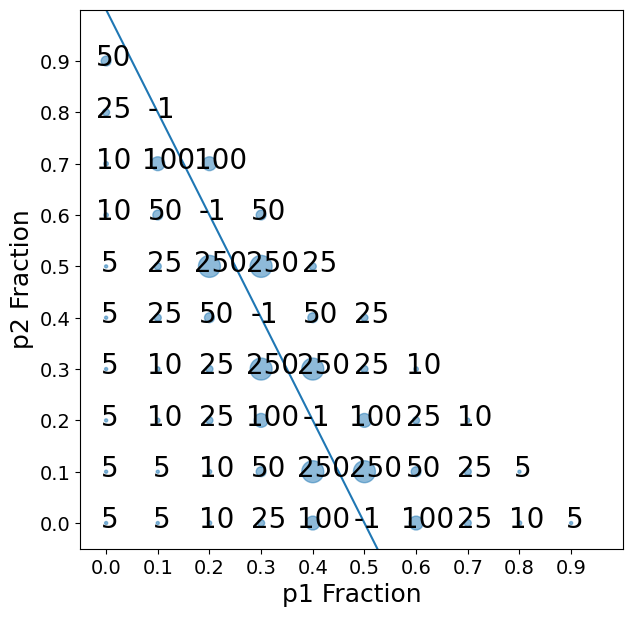

In [25]:
plt.figure(figsize=(7,7))
plt.scatter(p1_vals, p2_vals, s=required_sample_sizes, alpha=0.5)
plt.xticks(np.arange(0,1,.1), fontsize=14)
plt.yticks(np.arange(0,1,.1), fontsize=14)
plt.xlabel('p1 Fraction', fontsize=18)
plt.ylabel('p2 Fraction', fontsize=18)
for i,r in enumerate(required_sample_sizes):
    plt.annotate(r, (p1_vals[i]-.01*len(str(r)), p2_vals[i]-.01), fontsize=20, fontweight=2)
plt.plot(p1_vals, -2*p1_vals+1)
plt.xlim(-.05,1)
plt.ylim(-.05,1)

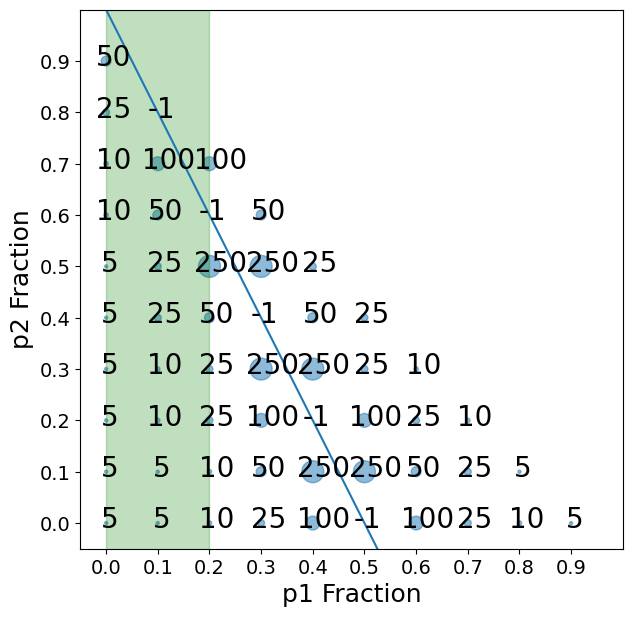

In [26]:
plt.figure(figsize=(7,7))
plt.scatter(p1_vals, p2_vals, s=required_sample_sizes, alpha=0.5)
plt.xticks(np.arange(0,1,.1), fontsize=14)
plt.yticks(np.arange(0,1,.1), fontsize=14)
plt.xlabel('p1 Fraction', fontsize=18)
plt.ylabel('p2 Fraction', fontsize=18)
for i,r in enumerate(required_sample_sizes):
    plt.annotate(r, (p1_vals[i]-.01*len(str(r)), p2_vals[i]-.01), fontsize=20, fontweight=2)
plt.plot(p1_vals, -2*p1_vals+1)
plt.xlim(-.05,1)
plt.ylim(-.05,1)
plt.fill_betweenx([-.1,1], 0, 0.2, color='green', alpha=0.25)